In [11]:
from sportsipy.mlb.teams import Teams
from scipy.stats import pearsonr
from scipy.stats import skew,kurtosis
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections

In [18]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
    df = pd.DataFrame(statd)
    df = df.transpose()

    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))

print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))

IndentationError: expected an indented block (<ipython-input-18-760eee2bd9cb>, line 10)

In [4]:
year=1984
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))].head(1)
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

1984 Luckiest,Median,Unluckiest Teams:
               Team   W   L    G   GF   GA  WinPct   GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
      New York Mets  90  72  162  648  680  55.556  -32   -0.2  48.795     3    18     15     0   5.556
    Minnesota Twins  81  81  162  680  680      50    0      0      50    11    13      2     4       0
 Pittsburgh Pirates  75  87  162  615  567  46.296   48    0.3   52.03    18     4    -14    25  -3.704


In [ ]:
'''
1984 Luckiest,Median,Unluckiest Teams: (most anomolous)
               Team   W   L    G   GF   GA  WinPct   GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
      New York Mets  90  72  162  648  680  55.556  -32   -0.2  48.795     3    18     15     0   5.556
    Minnesota Twins  81  81  162  680  680      50    0      0      50    11    13      2     4       0
 Pittsburgh Pirates  75  87  162  615  567  46.296   48    0.3   52.03    18     4    -14    25  -3.704
    
2010 Luckiest,Median,Unluckiest Teams: (most predictable)
             Team   W   L    G   GF   GA  WinPct    GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
   Houston Astros  76  86  162  615  729  46.914  -114   -0.7  45.759    21    25      4     0  -3.086
   Detroit Tigers  81  81  162  745  745      50     0      0      50    15    15      0    10       0
 Colorado Rockies  83  79  162  777  712  51.235    65    0.4  52.183    13    10     -3    28   1.235
'''

In [17]:
year=1970
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GD','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igd'] =  index

'''
x = list(df['GD'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igd'] =  index'
'''

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

'''
x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index
'''    
df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
print('%s MLB Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s MLB Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s MLB Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

1970 MLB Season - Ranked by % Games Won [>LosPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Baltimore Orioles,108,54,162,793,567,66.667,1.4,58.309,0,0,0,10
1,Cincinnati Reds,102,60,162,777,680,62.963,0.6,53.329,1,3,2,4
2,Minnesota Twins,98,64,162,745,599,60.494,0.9,55.432,2,1,-1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Milwaukee Brewers,65,97,163,619,749,39.877,-0.8,45.249,21,21,0,10
22,San Diego Padres,63,99,162,680,793,38.889,-0.7,46.164,22,19,-3,21
23,Chicago White Sox,56,106,162,631,826,34.568,-1.2,43.308,23,23,0,10



1970 MLB Season - Ranked by % Points Scored [<GfrPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Baltimore Orioles,108,54,162,793,567,66.667,1.4,58.309,0,0,0,10
2,Minnesota Twins,98,64,162,745,599,60.494,0.9,55.432,2,1,-1,14
10,Chicago Cubs,84,78,162,810,680,51.852,0.8,54.362,10,2,-8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Milwaukee Brewers,65,97,163,619,749,39.877,-0.8,45.249,21,21,0,10
17,Philadelphia Phillies,73,88,161,595,724,45.342,-0.8,45.11,17,22,5,0
23,Chicago White Sox,56,106,162,631,826,34.568,-1.2,43.308,23,23,0,10



1970 MLB Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
17,Philadelphia Phillies,73,88,161,595,724,45.342,-0.8,45.11,17,22,5,0
13,Detroit Tigers,79,83,162,664,729,48.765,-0.4,47.667,13,16,3,1
3,New York Yankees,93,69,163,684,619,57.055,0.4,52.494,3,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,San Diego Padres,63,99,162,680,793,38.889,-0.7,46.164,22,19,-3,21
11,New York Mets,83,79,162,696,631,51.235,0.4,52.449,11,7,-4,22
10,Chicago Cubs,84,78,162,810,680,51.852,0.8,54.362,10,2,-8,23


In [27]:
minDelta = 0
maxDelta = 0
deltaList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        G = team.games
        GF = int(G*team.runs)
        GA = int(G*team.runs_against)
        statd[i] = {'Team' : team.name,
                    'WinPct' : round(100*team.wins/G,3),
                    'GfrPct' : round(100*GF/(GF+GA),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    l = df[['WinPct','GfrPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Iwin'] =  index

    l = df[['GfrPct','WinPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Igfp'] =  index

    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
        
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d)

deltaList=sorted(deltaList,reverse=False)

1970  Chicago Cubs: -8 (new minDelta) (new maxDelta)
1972  Chicago White Sox: 7 (new max)
1973  Detroit Tigers: 9 (new max)
1981  Texas Rangers: -9 (new min)
1981  Baltimore Orioles: 13 (new max)
1984  Pittsburgh Pirates: -14 (new min)
1984  New York Mets: 15 (new max)


In [28]:
print('max: ' + str(max(deltaList)))
print('min: ' + str(min(deltaList)))
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),2)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),2)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),2)))
print('skew: ' + str(round(skew(deltaList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(deltaList,bias=False)-3,2)))

quartiles=[round(q, 2) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(deltaList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

max: 15
min: -14
median: 0.0
mean: 0
mode: 0
pstdev: 3.13
pvariance: 9.82
skew: 0.06
kurtosis-3: -1.31
quartiles(excl): [-2.0, 0.0, 2.0]
deciles(excl): [-4.0, -2.0, -1.0, -1.0, 0.0, 1.0, 1.0, 2.0, 4.0]
count: 1414


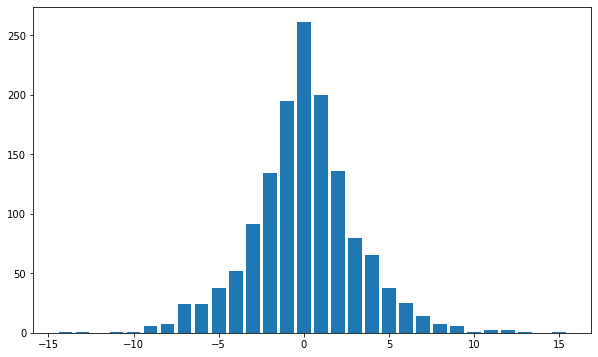

In [29]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

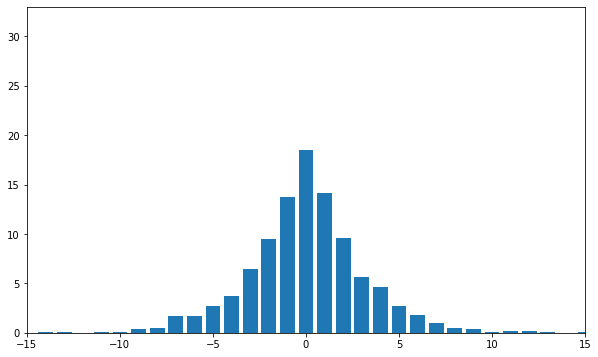

In [34]:
df_freq=pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
delp = list(df_freq['pct'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,delp)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

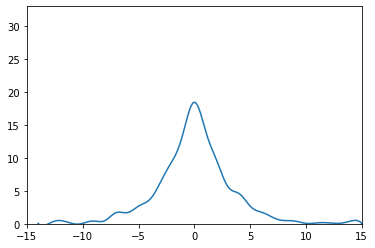

In [36]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(delx), max(delx), 200) 

#define spline
spl = make_interp_spline(delx, delp, k=5)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

In [31]:
pd.DataFrame(list(zip(delx,dely,delp)),columns=['delta','freq','pct'])

,delta,freq,pct
0,-14,1,0.07
1,-13,1,0.07
2,-11,1,0.07
3,-10,1,0.07
4,-9,6,0.42
5,-8,7,0.50
6,-7,24,1.70
7,-6,24,1.70
8,-5,38,2.69
9,-4,52,3.68
